# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazacorte
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | timimoun
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | gunja
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | eyl
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | nova vicosa
Processing Record 15 of Set 1 | bodo
Processing Record 16 of Set 1 | igarka
Processing Record 17 of Set 1 | beihai
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | kurtalan
Processing Record 22 of Set 1 | puerto ayora
Processing Reco

Processing Record 38 of Set 4 | ciudad insurgentes
Processing Record 39 of Set 4 | happy valley-goose bay
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | itaituba
Processing Record 42 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | port douglas
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | constantia
Processing Record 48 of Set 4 | obock
Processing Record 49 of Set 4 | itoman
Processing Record 0 of Set 5 | conception bay south
Processing Record 1 of Set 5 | mawlaik
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | visby
Processing Record 5 of Set 5 | great falls
Processing Record 6 of Set 5 | cape canaveral
Processing Record 7 of Set 5 | monrovia
Processing Record 8 of Set 5 | inarajan village
Processing Record 9 of Set 5 | acarau
Processing Record 1

Processing Record 30 of Set 8 | fale old settlement
Processing Record 31 of Set 8 | roshchino
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | fort st. john
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | new norfolk
Processing Record 36 of Set 8 | bayganin
Processing Record 37 of Set 8 | yen vinh
Processing Record 38 of Set 8 | goondiwindi
Processing Record 39 of Set 8 | kirensk
Processing Record 40 of Set 8 | luganville
Processing Record 41 of Set 8 | kahuta
Processing Record 42 of Set 8 | mikhaylovskoye
Processing Record 43 of Set 8 | ha'il
Processing Record 44 of Set 8 | maintirano
Processing Record 45 of Set 8 | walvis bay
Processing Record 46 of Set 8 | farsala
Processing Record 47 of Set 8 | kingscliff
Processing Record 48 of Set 8 | calabozo
Processing Record 49 of Set 8 | loreto
Processing Record 0 of Set 9 | jiangyou
Processing Record 1 of Set 9 | miyako
Processing Record 2 of Set 9 | tuzantla
Processing Record 3 of Set 9

City not found. Skipping...
Processing Record 19 of Set 12 | littlefield
Processing Record 20 of Set 12 | rafsanjan
Processing Record 21 of Set 12 | dindori
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | lospalos
Processing Record 24 of Set 12 | binzhou
Processing Record 25 of Set 12 | masterton
Processing Record 26 of Set 12 | morehead city
Processing Record 27 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 28 of Set 12 | aioun
Processing Record 29 of Set 12 | waldmunchen
Processing Record 30 of Set 12 | khagaria
Processing Record 31 of Set 12 | ulsteinvik
Processing Record 32 of Set 12 | al ghayzah
Processing Record 33 of Set 12 | ashdod
Processing Record 34 of Set 12 | erdenet
Processing Record 35 of Set 12 | mystic island
Processing Record 36 of Set 12 | freetown
Processing Record 37 of Set 12 | kenora
Processing Record 38 of Set 12 | slave lake
Processing Record 39 of Set 12 | amungan
Processing Record 40 of Set 12 | bardai


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazacorte,28.6290,-17.9293,19.54,78,20,5.14,ES,1702001160
1,waitangi,-43.9535,-176.5597,13.23,70,79,7.88,NZ,1702001160
2,ribeira grande,38.5167,-28.7000,19.87,95,100,9.83,PT,1702001160
3,timimoun,29.2639,0.2310,13.21,58,0,5.14,DZ,1702001160
4,afaahiti,-17.7500,-149.2833,25.93,85,100,8.82,PF,1702001160


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,19.54,78,20,5.14,ES,1702001160
1,waitangi,-43.9535,-176.5597,13.23,70,79,7.88,NZ,1702001160
2,ribeira grande,38.5167,-28.7000,19.87,95,100,9.83,PT,1702001160
3,timimoun,29.2639,0.2310,13.21,58,0,5.14,DZ,1702001160
4,afaahiti,-17.7500,-149.2833,25.93,85,100,8.82,PF,1702001160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

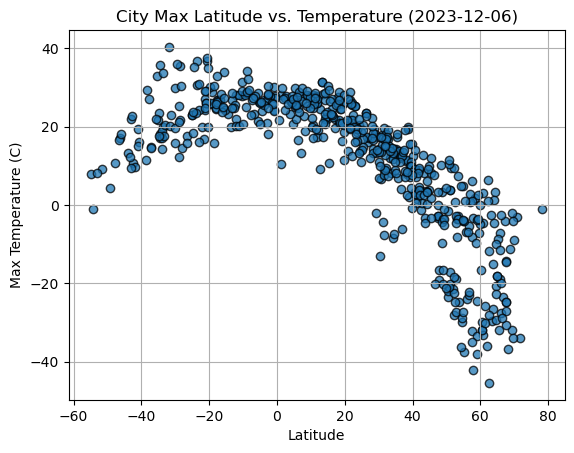

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

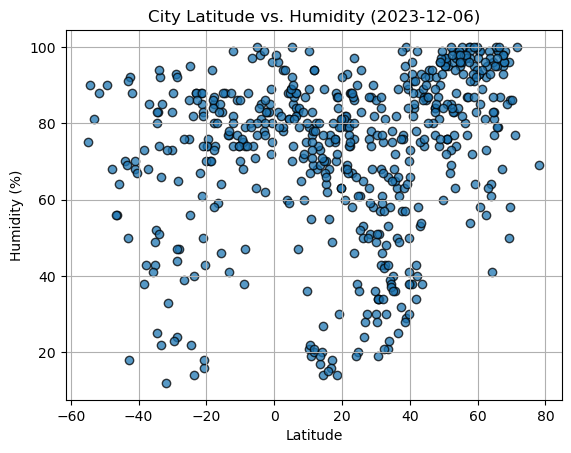

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

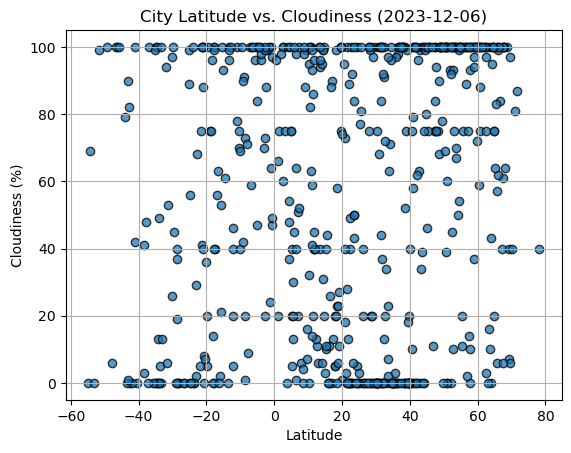

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

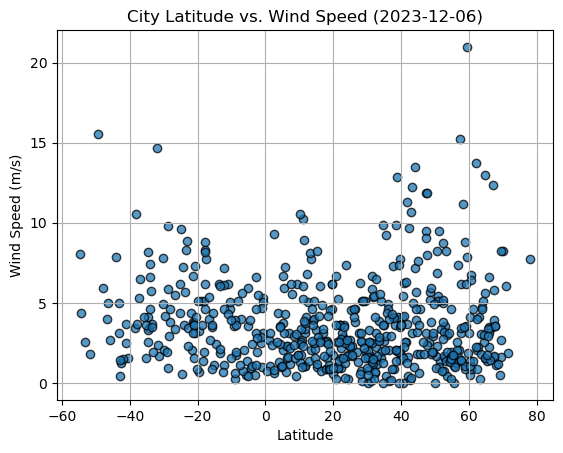

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values, title, coordinate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coordinate, fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,19.54,78,20,5.14,ES,1702001160
2,ribeira grande,38.5167,-28.7000,19.87,95,100,9.83,PT,1702001160
3,timimoun,29.2639,0.2310,13.21,58,0,5.14,DZ,1702001160
5,gunja,44.8800,18.8533,3.86,86,80,1.83,HR,1702001161
6,tiksi,71.6872,128.8694,-34.08,100,87,1.86,RU,1702001162


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,13.23,70,79,7.88,NZ,1702001160
4,afaahiti,-17.7500,-149.2833,25.93,85,100,8.82,PF,1702001160
8,blackmans bay,-43.0167,147.3167,22.07,50,90,0.45,AU,1702001163
10,adamstown,-25.0660,-130.1015,23.08,76,89,4.35,PN,1702001164
11,port-aux-francais,-49.3500,70.2167,4.46,90,100,15.56,TF,1702001166


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7199427887706232


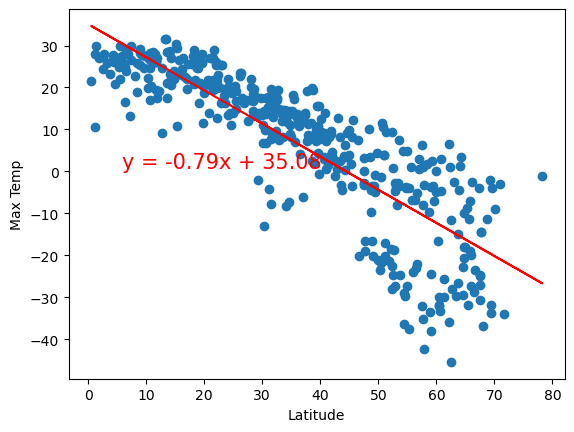

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values,y_values, 'Max Temp', (5.8,0.8))
   

The r-value is: 0.30066996628106146


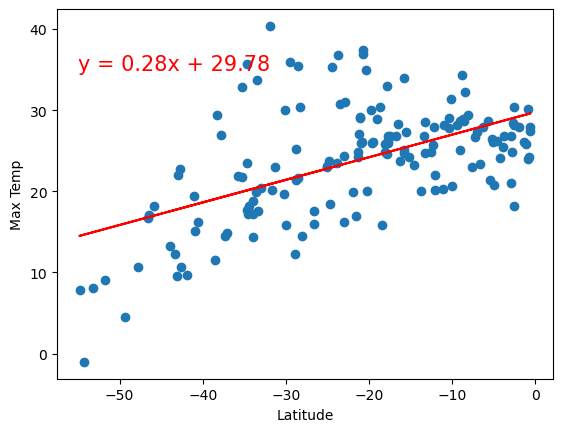

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values,y_values, 'Max Temp', (-55,35))

**Discussion about the linear relationship:** The Northern Hemisphere exhibits a robust negative linear trend, while the Southern Hemisphere displays a strong positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09541543783443876


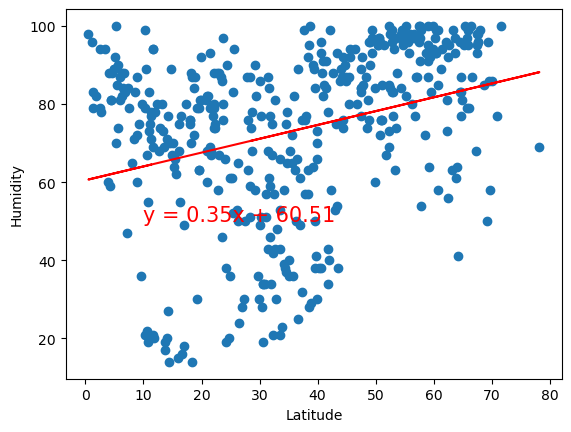

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values,y_values, 'Humidity', (10,50))

The r-value is: 0.0626575004603542


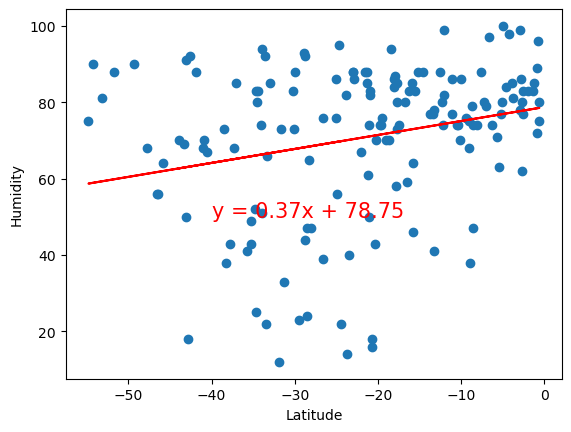

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values,y_values, 'Humidity', (-40,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05739061356871737


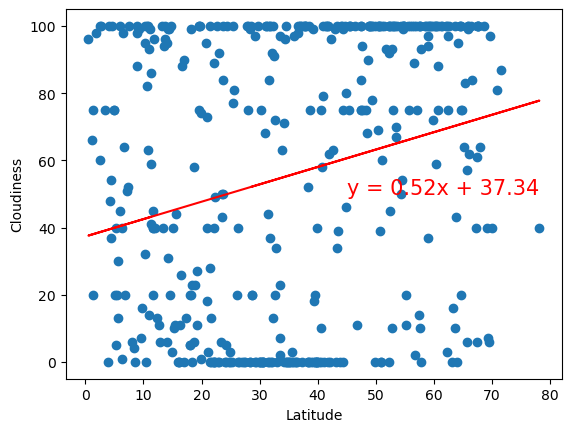

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values,y_values, 'Cloudiness', (45,50))

The r-value is: 0.07994791744666825


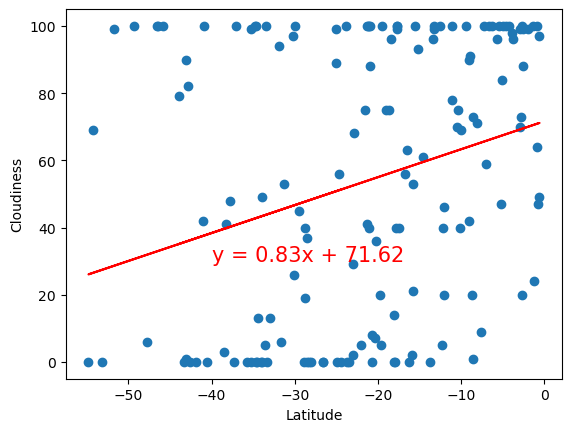

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values,y_values, 'Cloudiness', (-40,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015410638823915074


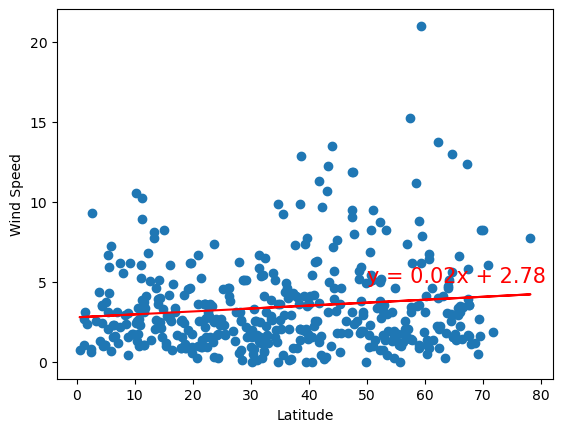

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values,y_values, 'Wind Speed', (50,5))

The r-value is: 0.047390944247853777


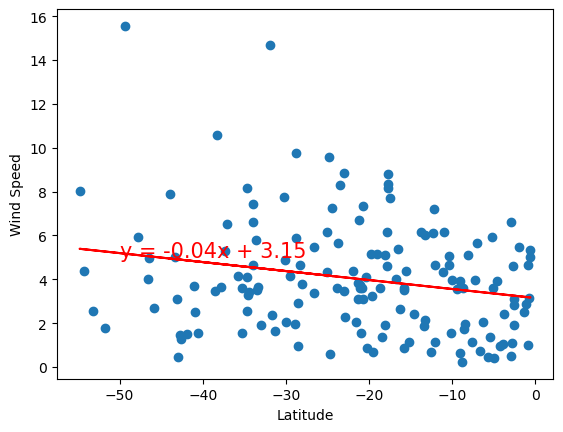

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values,y_values, 'Wind Speed', (-50,5))

**Discussion about the linear relationship:** The wind speed in the Northern Hemisphere tends to rise with increasing latitude, whereas in the Southern Hemisphere, it generally decreases as latitude rises.